In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import truncnorm
from seqstein import SeqStein, SIM
import warnings

warnings.filterwarnings('ignore')

# SIM: Sine Function

In [2]:
s_star = 3
n_features = 10
n_samples = 10000

np.random.seed(1)
beta = np.zeros(n_features)
supp_ids = np.random.choice(n_features, s_star)
beta[supp_ids]=np.random.choice((-1, 1), s_star) / np.sqrt(s_star)

x = np.random.normal(0, 0.3, size=(n_samples, n_features))
y = np.sin(np.pi*(np.dot(x, beta))) + 0.1 * np.random.randn(n_samples)

In [3]:
%%time

reg = SIM(method="first", reg_lambda=0.3, reg_gamma="GCV", knot_num=10, degree=3, random_state=0)
reg.fit(x,y)

CPU times: user 2.92 s, sys: 2.81 s, total: 5.74 s
Wall time: 255 ms


SIM(method='first', reg_lambda=0.3)

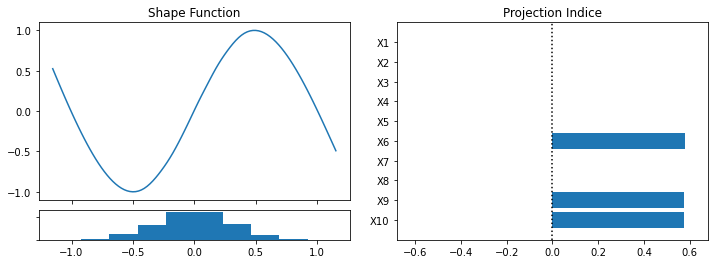

In [4]:
reg.visualize()

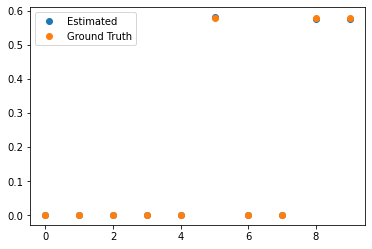

In [5]:
plt.plot(np.abs(reg.beta_), "o")
plt.plot(np.abs(beta), "o")
plt.legend(["Estimated", "Ground Truth"])
plt.show()

# SIM: Quadratic Function

In [6]:
n_features = 10
n_samples = 10000

np.random.seed(1)
beta = np.zeros(n_features)
supp_ids = np.random.choice(n_features, s_star)
beta[supp_ids]=np.random.choice((-1, 1), s_star) / np.sqrt(s_star)

x = np.random.normal(0, 0.3, size=(n_samples, n_features))
y = np.dot(x, beta) ** 2 + 0.1 * np.random.randn(n_samples)

In [7]:
%%time

reg = SIM(method="second", reg_lambda=0.3, reg_gamma="GCV", knot_num=10, degree=3, random_state=0)
reg.fit(x,y)

CPU times: user 1.68 s, sys: 2.18 s, total: 3.86 s
Wall time: 276 ms


SIM(reg_lambda=0.3)

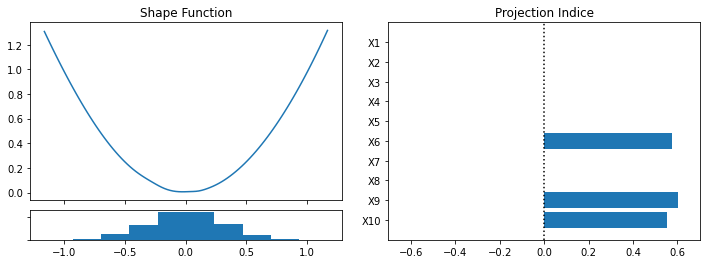

In [8]:
reg.visualize()

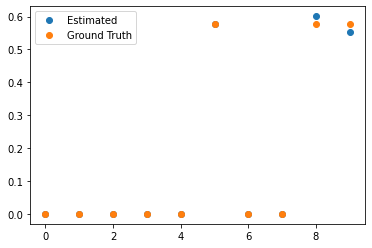

In [9]:
plt.plot(np.abs(reg.beta_), "o")
plt.plot(np.abs(beta), "o")
plt.legend(["Estimated", "Ground Truth"])
plt.show()

# AIM

In [10]:
random_state = 0
np.random.seed(random_state)
beta1 = np.array([0.1, 0.9, 0, 0, 0, 0, 0, 0, 0, 0])
beta2 = np.array([0, 0.1, 0.9, 0, 0, 0, 0, 0, 0, 0])
beta3 = np.array([0, 0, 0.1, 0.9, 0, 0, 0, 0, 0, 0])

beta = np.vstack([beta1, beta2, beta3])
model_list = [lambda x: 0.2 * np.exp(-4 * x), lambda x: 5 * x ** 2, lambda x: 2.5 * np.sin(1.5 * np.pi * x)]

x = truncnorm.rvs(a=-3, b=3, loc = 0, scale=1 / 3, size=(20000, 10), random_state=random_state)
noise = np.random.randn(20000).reshape(-1, 1)
y = np.reshape(0.2 * np.exp(-4 * np.dot(x, beta1)) + \
               5 * (np.dot(x, beta2)) ** 2 + 2.5 * np.sin(np.pi * 1.5 * np.dot(x, beta3)), [-1, 1]) + noise
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=random_state)

In [11]:
%%time
reg = SeqStein(nterms=3, reg_lambda=[0.1,0.5,0.9],
                 reg_gamma='GCV', knot_num=10,
                 early_stop_thres=1, ortho_enhance=True,
                 val_ratio=0.2,
                 random_state=random_state)
reg.fit(train_x,train_y)

CPU times: user 1min, sys: 1min 7s, total: 2min 7s
Wall time: 8.94 s


SeqStein(nterms=3, reg_gamma=['GCV'], reg_lambda=[0.1, 0.5, 0.9])

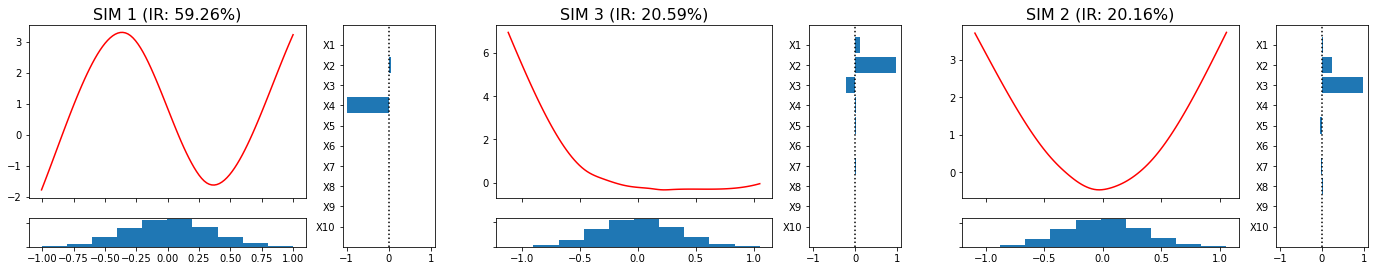

In [12]:
reg.visualize()